# Comparison between the ages for the genders and types

Questions
- What are the differences between the ages for the different combinations of gender and types?
- Do we observe the same changes as globally?


Age effect - General Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [11]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between ages, types and genders
F_SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1), alpha=0.05, test="Wald")
M_SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,0), alpha=0.05, test="Wald")
M_GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1), alpha=0.05, test="Wald")
F_SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1,0), alpha=0.05, test="Wald")
M_SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,0,0), alpha=0.05, test="Wald")
M_GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1,0), alpha=0.05, test="Wald")
F_SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1,-1), alpha=0.05, test="Wald")
M_SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,0,0), alpha=0.05, test="Wald")
M_GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1,-1), alpha=0.05, test="Wald")

In [7]:
to_comp = c("52w VS 8w (F, SPF)","52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)",
            "104w VS 52w (F, SPF)", "104w VS 52w (F, GF)", "104w VS 52w (M, SPF)", "104w VS 52w (M, GF)",
            "104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)")

# Stats

In [8]:
age_gender_type_stats = matrix(0, nrow=12, ncol=3)
rownames(age_gender_type_stats) = to_comp
colnames(age_gender_type_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_gender_type_stats["52w VS 8w (F, SPF)",] = get_stats_padj(F_SPF_52w_8w)
age_gender_type_stats["52w VS 8w (F, GF)",] = get_stats_padj(F_GF_52w_8w)
age_gender_type_stats["52w VS 8w (M, SPF)",] = get_stats_padj(M_SPF_52w_8w)
age_gender_type_stats["52w VS 8w (M, GF)",] = get_stats_padj(M_GF_52w_8w)
age_gender_type_stats["104w VS 52w (F, SPF)",] = get_stats_padj(F_SPF_104w_52w)
age_gender_type_stats["104w VS 52w (F, GF)",] = get_stats_padj(F_GF_104w_52w)
age_gender_type_stats["104w VS 52w (M, SPF)",] = get_stats_padj(M_SPF_104w_52w)
age_gender_type_stats["104w VS 52w (M, GF)",] = get_stats_padj(M_GF_104w_52w)
age_gender_type_stats["104w VS 8w (F, SPF)",] = get_stats_padj(F_SPF_104w_8w)
age_gender_type_stats["104w VS 8w (F, GF)",] = get_stats_padj(F_GF_104w_8w)
age_gender_type_stats["104w VS 8w (M, SPF)",] = get_stats_padj(M_SPF_104w_8w)
age_gender_type_stats["104w VS 8w (M, GF)",] = get_stats_padj(M_GF_104w_8w)
age_gender_type_stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
"52w VS 8w (F, SPF)",1799,1038,761
"52w VS 8w (F, GF)",1026,635,391
"52w VS 8w (M, SPF)",367,246,121
"52w VS 8w (M, GF)",230,126,104
"104w VS 52w (F, SPF)",216,117,99
"104w VS 52w (F, GF)",449,231,218
"104w VS 52w (M, SPF)",3428,1845,1583
"104w VS 52w (M, GF)",2747,1379,1368
"104w VS 8w (F, SPF)",2004,1109,895
"104w VS 8w (F, GF)",1428,772,656


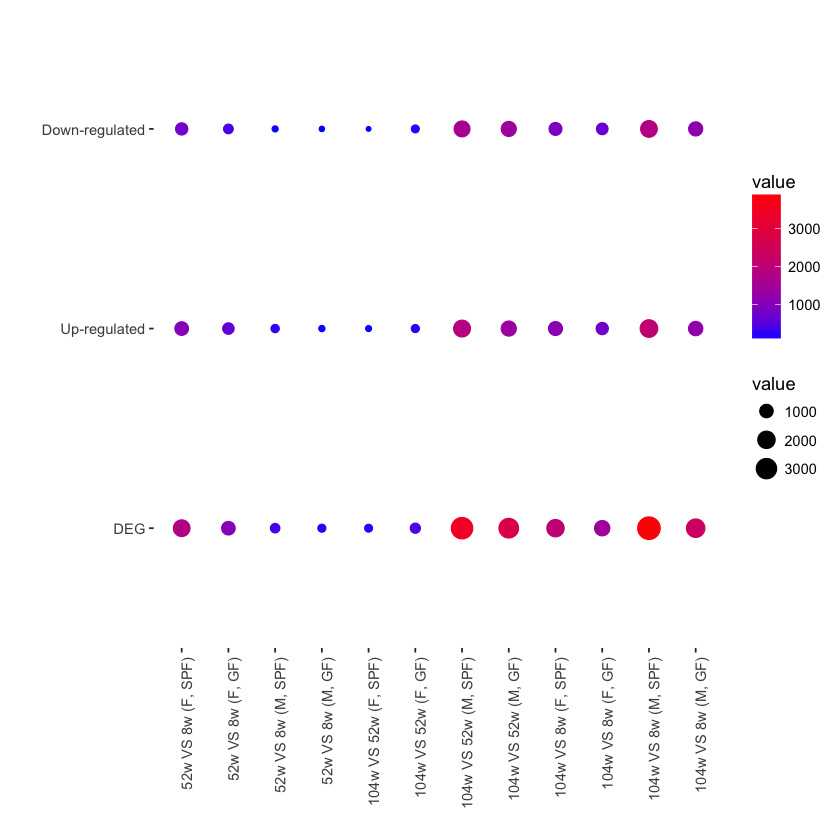

In [9]:
plot_stat_mat(age_gender_type_stats)

# Differentially expressed genes

In [13]:
age_type_gender_data = list(F_SPF_52w_8w, F_GF_52w_8w, M_SPF_52w_8w, M_GF_52w_8w,
                            F_SPF_104w_52w, F_GF_104w_52w, M_SPF_104w_52w, M_GF_104w_52w,
                            F_SPF_104w_8w, F_GF_104w_8w, M_SPF_104w_8w, M_GF_104w_8w)
names(age_type_gender_data) = rownames(age_gender_type_stats) = to_comp
age_type_gender_deg = extract_diff_expr_genes(age_type_gender_data, "age-effect/age_type_gender/")

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”

# Comparison of the numbers per types

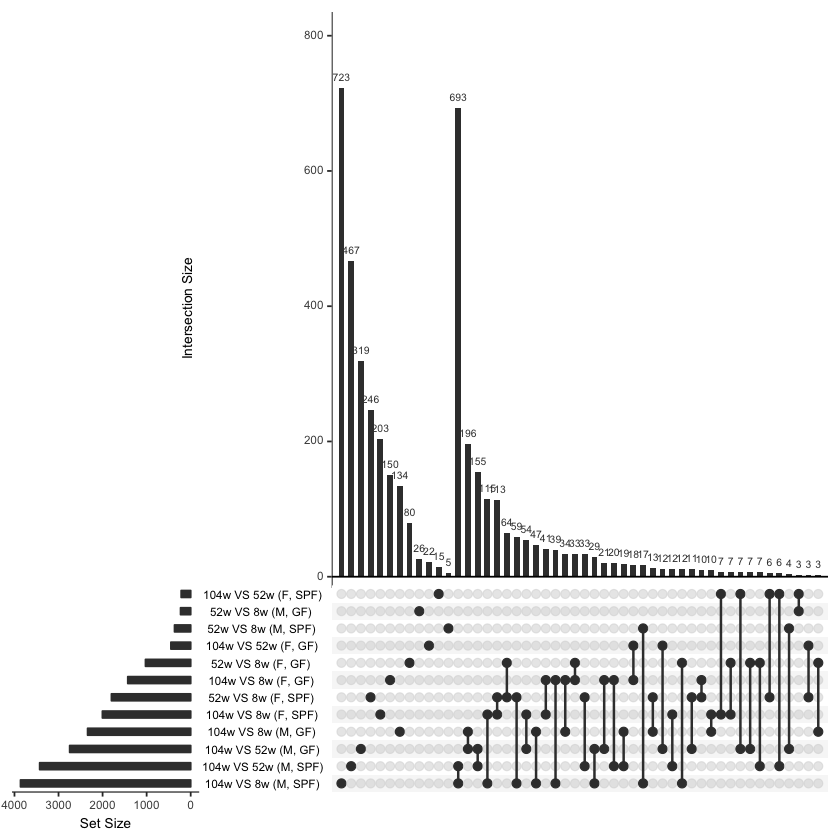

In [14]:
upset(as.data.frame(age_type_gender_deg$deg), nsets = 12, nintersects=50)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated


## 52w VS 8w

52w VS 8w | M | F
--- | --- | ---
SPF | |
GF | | 

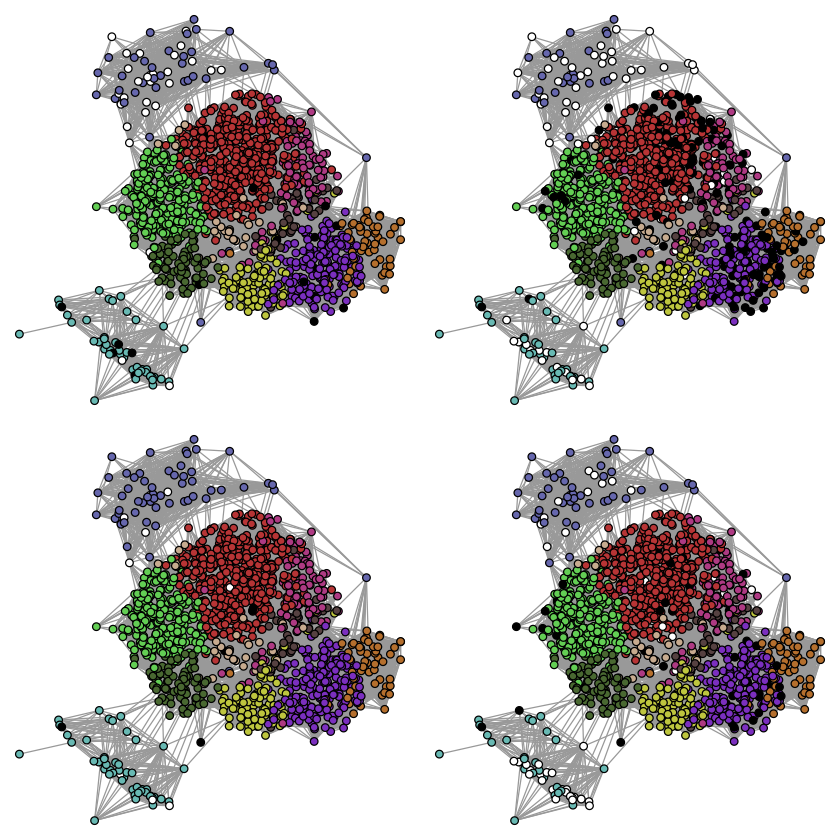

In [15]:
par(mfrow=c(2,2),mar=c(0,0,0,0))
col_52w_vs_8w_F_GF = get_deg_colors(age_type_gender_deg, "52w VS 8w (M, SPF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_F_GF, pal2, layout, add_legend=F)
col_52w_vs_8w_M_GF = get_deg_colors(age_type_gender_deg, "52w VS 8w (F, SPF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_M_GF, pal2, layout, add_legend=F)
col_52w_vs_8w_F_SPF = get_deg_colors(age_type_gender_deg, "52w VS 8w (M, GF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_F_SPF, pal2, layout, add_legend=F)
col_52w_vs_8w_M_SPF = get_deg_colors(age_type_gender_deg, "52w VS 8w (F, GF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_M_SPF, pal2, layout, add_legend=F)

## 104w VS 52w

104w VS 52w | M | F
--- | --- | ---
SPF | |
GF | | 

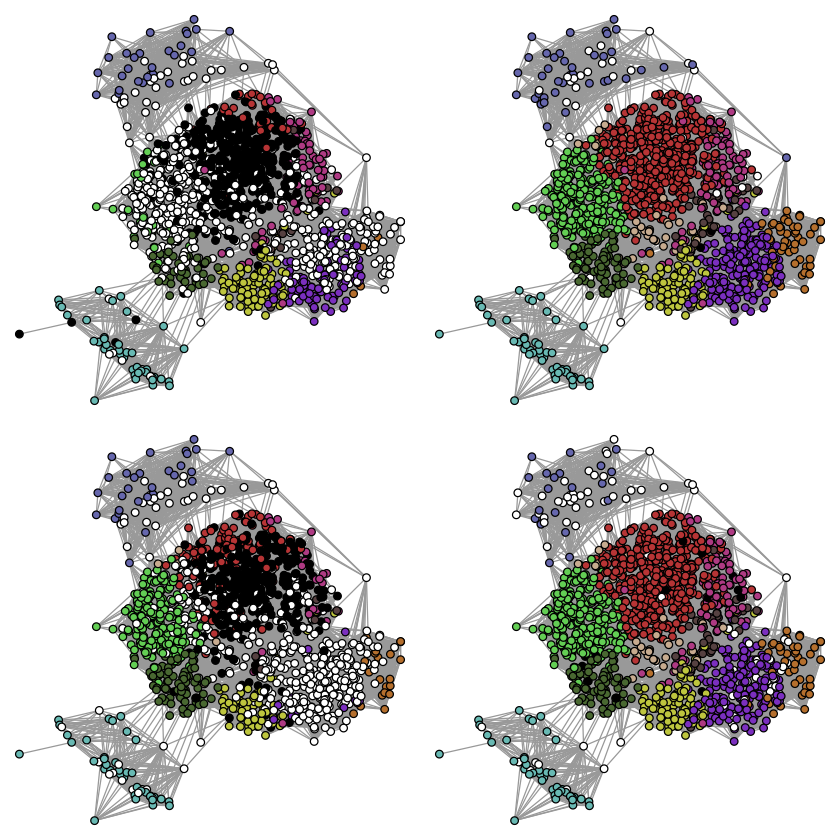

In [16]:
par(mfrow=c(2,2),mar=c(0,0,0,0))
col_104w_vs_52w_F_GF = get_deg_colors(age_type_gender_deg, "104w VS 52w (M, SPF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_F_GF, pal2, layout, add_legend=F)
col_104w_vs_52w_M_GF = get_deg_colors(age_type_gender_deg, "104w VS 52w (F, SPF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_M_GF, pal2, layout, add_legend=F)
col_104w_vs_52w_F_SPF = get_deg_colors(age_type_gender_deg, "104w VS 52w (M, GF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_F_SPF, pal2, layout, add_legend=F)
col_104w_vs_52w_M_SPF = get_deg_colors(age_type_gender_deg, "104w VS 52w (F, GF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_M_SPF, pal2, layout, add_legend=F)

# GO analysis

In [17]:
full_go_desc = age_type_gender_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = age_type_gender_deg$GO_wall[[1]][,"category"]
comp = colnames(age_type_gender_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

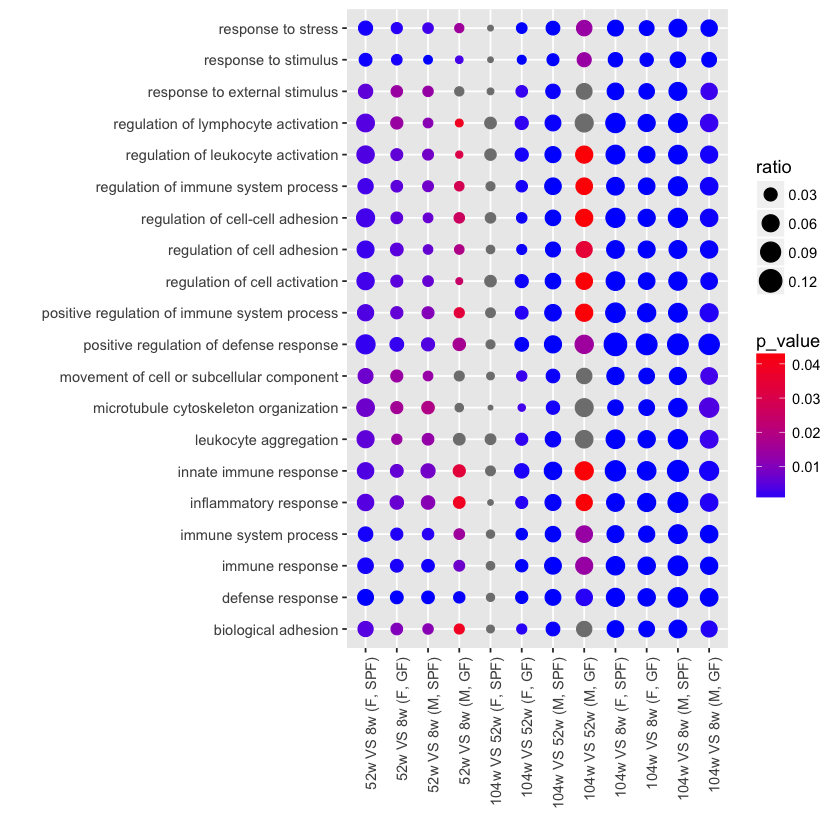

In [18]:
plot_top_go(age_type_gender_deg$over_represented_GO,
            age_type_gender_deg$GO_wall,
            "BP",
            comp,
            20)

Network based on description similarity

In [19]:
BP_network = create_GO_network(age_type_gender_deg, "BP", BP_GO)

### 52w VS 8w

52w VS 8w | M | F
--- | --- | ---
SPF | |
GF | | 

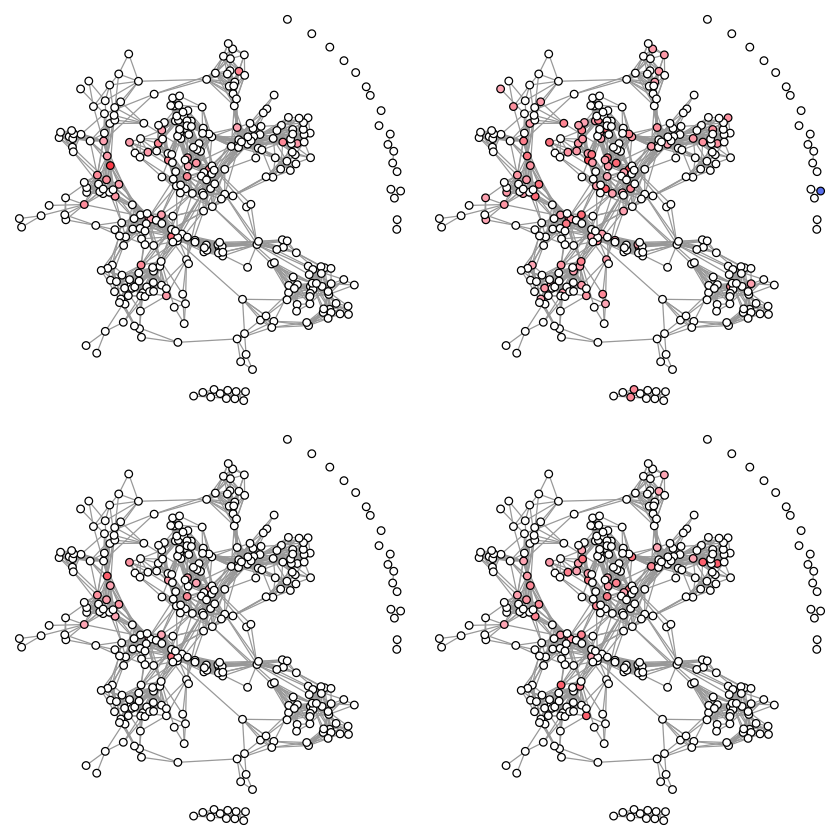

In [20]:
par(mfrow=c(2,2),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "52w VS 8w (M, SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "52w VS 8w (F, SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "52w VS 8w (M, GF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "52w VS 8w (F, GF)", full_go_desc, plot_interactive = FALSE)

### 104w VS 52w

104w VS 52w | M | F
--- | --- | ---
SPF | |
GF | | 

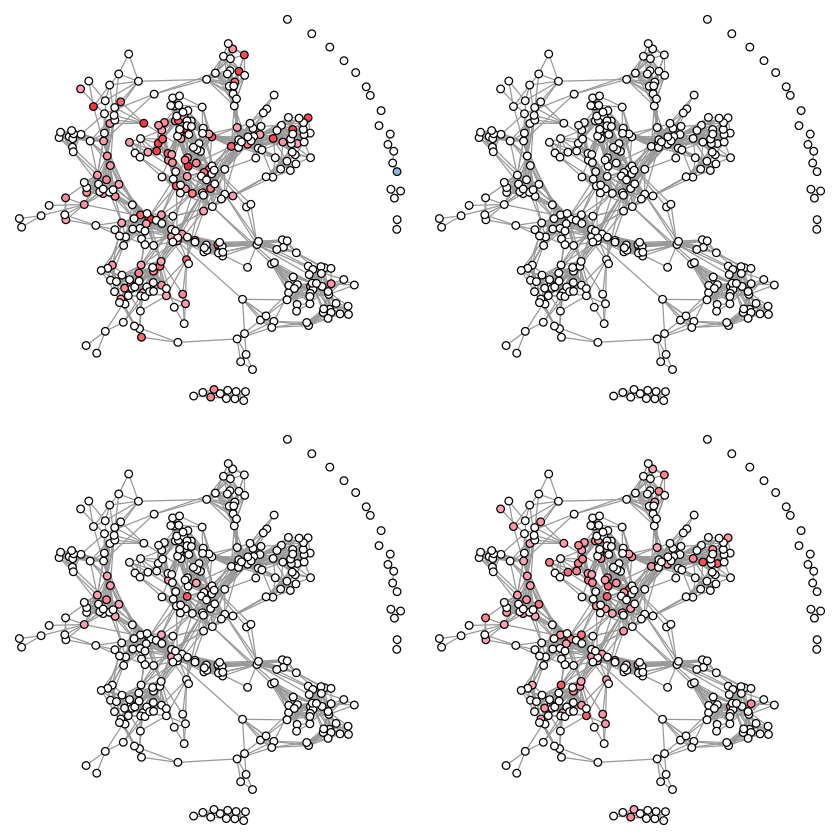

In [21]:
par(mfrow=c(2,2),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "104w VS 52w (M, SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (F, SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (M, GF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (F, GF)", full_go_desc, plot_interactive = FALSE)

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

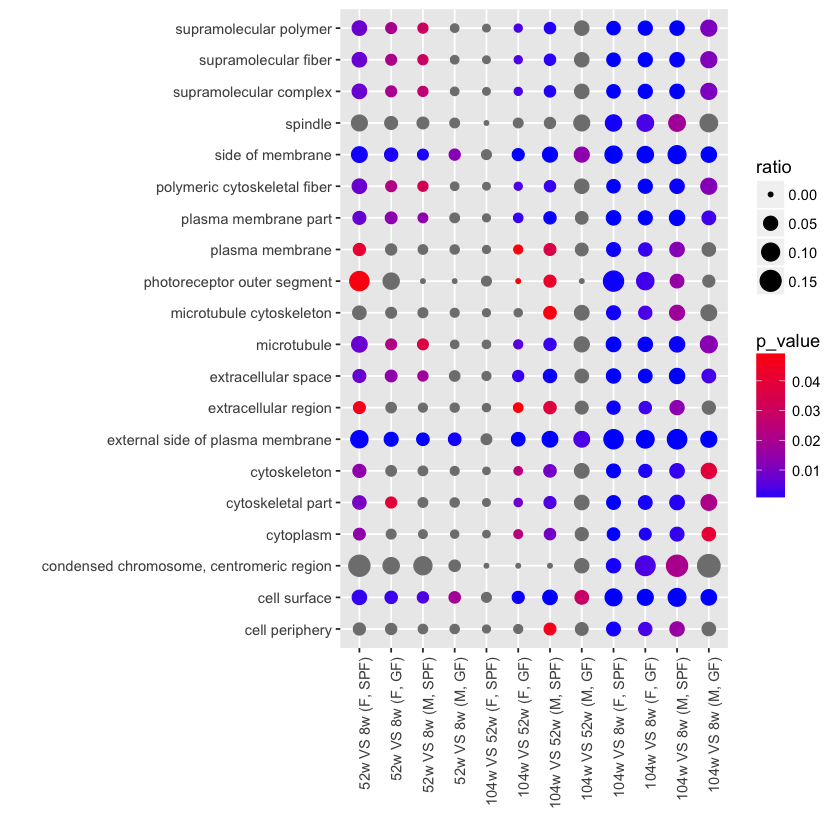

In [22]:
plot_top_go(age_type_gender_deg$over_represented_GO,
            age_type_gender_deg$GO_wall,
            "CC",
            comp,
            20)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

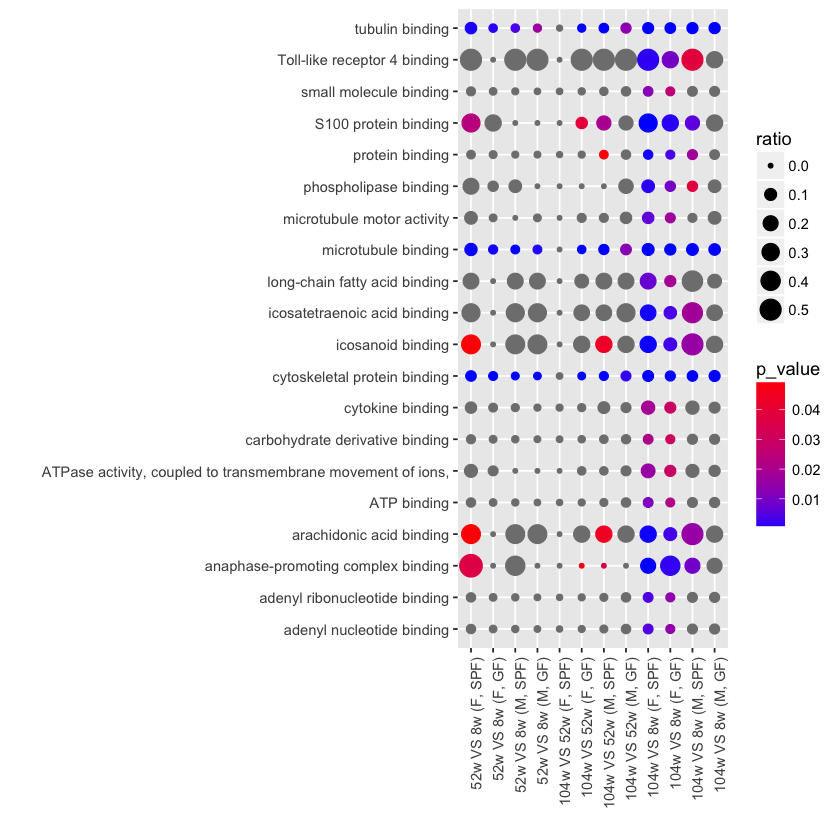

In [23]:
plot_top_go(age_type_gender_deg$over_represented_GO,
            age_type_gender_deg$GO_wall,
            "MF",
            comp,
            20)

# KEGG pathways

In [24]:
plot_kegg_pathways(age_type_gender_deg$over_represented_KEGG[,"category"],
                   age_type_gender_deg$fc_deg,
                   "../results/dge/age-effect/age_type_gender/kegg/over_repr_kegg/")

[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."


Warning message in file.rename(from = paste("mmu", cat, ".pathview.multi.png", sep = ""), :
“cannot rename file 'mmu00533.pathview.multi.png' to '../results/dge/age-effect/age_type_gender/kegg/over_repr_kegg/mmu00533.pathview.multi.png', reason 'No such file or directory'”

[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."


In [25]:
plot_kegg_pathways(age_type_gender_deg$under_represented_KEGG[,"category"],
                   age_type_gender_deg$fc_deg,
                   "../results/dge/age-effect/age_type_gender/kegg/under_repr_kegg/")

[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."
[1] "Note: 91 of 7590 unique input IDs unmapped."


Warning message in download.file(xml.url, xml.target, quiet = T):
“cannot open URL 'http://rest.kegg.jp/get/mmu00300/kgml': HTTP status was '404 Not Found'”Warning message in file.rename(from = paste("mmu", cat, ".pathview.multi.png", sep = ""), :
“cannot rename file 'mmu00300.pathview.multi.png' to '../results/dge/age-effect/age_type_gender/kegg/under_repr_kegg/mmu00300.pathview.multi.png', reason 'No such file or directory'”

[1] "Note: 91 of 7590 unique input IDs unmapped."
